In [1]:
# FIFA World Cup Data Analysis (1930–2022)

## Objective
# The goal of this project is to analyze historical FIFA World Cup data to:
# - Identify dominant teams and players
# - Study goal-scoring trends
# - Analyze the impact of FIFA rankings on match outcomes
# - Extract meaningful insights using data analysis and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## 1. Data Loading

wc=pd.read_csv("world_cup.csv")
matches=pd.read_csv("matches_1930_2022.csv")
ranking=pd.read_csv("fifa_ranking_2022-10-06.csv")

In [3]:
wc

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,2022,Qatar,32,Argentina,France,Kylian Mbappé - 8,3404252,53191,64
1,2018,Russia,32,France,Croatia,Harry Kane - 6,3031768,47371,64
2,2014,Brazil,32,Germany,Argentina,James Rodríguez - 6,3429873,53592,64
3,2010,South Africa,32,Spain,Netherlands,"Wesley Sneijder, Thomas Müller... - 5",3178856,49670,64
4,2006,Germany,32,Italy,France,Miroslav Klose - 5,3352605,52384,64
5,2002,"Korea Republic, Japan",32,Brazil,Germany,Ronaldo - 8,2705337,42271,64
6,1998,France,32,France,Brazil,Davor Šuker - 6,2903477,45367,64
7,1994,United States,24,Brazil,Italy,"Hristo Stoichkov, Oleg Salenko - 6",3587538,68991,52
8,1990,Italy,24,West Germany,Argentina,Salvatore Schillaci - 6,2516215,48389,52
9,1986,Mexico,24,Argentina,West Germany,Gary Lineker - 6,2394031,46039,52


In [4]:
matches

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,NaN,0,NaN,NaN,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960,Yugoslavia,Brazil,2,NaN,NaN,1,NaN,NaN,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,Romania,Peru,3,NaN,NaN,1,NaN,NaN,Octav Luchide,Emerich Vogl,...,NaN,NaN,NaN,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN
962,United States,Belgium,3,NaN,NaN,0,NaN,NaN,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## 2. Data Cleaning & Preprocessing

In [5]:
matches.describe()

,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,Attendance,Year
count,964.000000,128.000000,35.000000,964.000000,128.000000,35.000000,964.000000,964.000000
mean,1.776971,1.435938,3.285714,1.044606,1.192187,3.057143,45693.374481,1989.244813
std,1.596676,0.860391,1.226459,1.071233,0.809258,1.136115,22704.131689,24.014409
min,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,2000.000000,1930.000000
25%,1.000000,0.800000,3.000000,0.000000,0.600000,2.000000,31800.000000,1974.000000
50%,1.000000,1.300000,3.000000,1.000000,1.000000,3.000000,42725.000000,1994.000000
75%,3.000000,1.925000,4.000000,2.000000,1.525000,4.000000,60984.500000,2010.000000
max,10.000000,5.200000,5.000000,7.000000,5.700000,5.000000,173850.000000,2022.000000


In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   home_team                        964 non-null    object 
 1   away_team                        964 non-null    object 
 2   home_score                       964 non-null    int64  
 3   home_xg                          128 non-null    float64
 4   home_penalty                     35 non-null     float64
 5   away_score                       964 non-null    int64  
 6   away_xg                          128 non-null    float64
 7   away_penalty                     35 non-null     float64
 8   home_manager                     964 non-null    object 
 9   home_captain                     644 non-null    object 
 10  away_manager                     964 non-null    object 
 11  away_captain                     644 non-null    object 
 12  Attendance            

In [7]:
ranking

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46
...,...,...,...,...,...,...,...
206,Sri Lanka,SRI,AFC,207,207,825.25,825.25
207,US Virgin Islands,VIR,CONCACAF,208,208,823.97,823.97
208,British Virgin Islands,VGB,CONCACAF,209,209,809.32,809.32
209,Anguilla,AIA,CONCACAF,210,210,790.74,790.74


In [8]:
ranking.shape

(211, 7)

In [9]:
wc.shape

(22, 9)

In [10]:
matches.shape

(964, 44)

In [11]:
wc.isna()

,Year,Host,Teams,Champion,Runner-Up,TopScorrer,Attendance,AttendanceAvg,Matches
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [12]:
ranking.isna()

,team,team_code,association,rank,previous_rank,points,previous_points
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
206,False,False,False,False,False,False,False
207,False,False,False,False,False,False,False
208,False,False,False,False,False,False,False
209,False,False,False,False,False,False,False


In [13]:
matches.isna()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,True,False,False,False,False
1,False,False,False,False,True,False,False,True,False,False,...,True,True,True,True,True,True,True,False,False,False
2,False,False,False,False,True,False,False,True,False,False,...,True,True,True,True,True,True,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,True,False,False,True,False,False,...,True,True,True,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,False,False,False,True,True,False,True,True,False,False,...,True,True,True,True,True,True,True,True,True,True
960,False,False,False,True,True,False,True,True,False,False,...,True,True,True,True,True,True,True,True,True,True
961,False,False,False,True,True,False,True,True,False,False,...,True,True,True,False,True,True,True,True,True,True
962,False,False,False,True,True,False,True,True,False,False,...,True,True,True,True,True,True,True,True,True,True


In [14]:
matches.isna().sum()

home_team                            0
away_team                            0
home_score                           0
home_xg                            836
home_penalty                       929
away_score                           0
away_xg                            836
away_penalty                       929
home_manager                         0
home_captain                       320
away_manager                         0
away_captain                       320
Attendance                           0
Venue                                0
Officials                          255
Round                                0
Date                                 0
Score                                0
Referee                            255
Notes                              891
Host                                 0
Year                                 0
home_goal                          246
away_goal                          393
home_goal_long                     246
away_goal_long           

In [15]:
matches.isna().sum().sum()

np.int64(20914)

In [16]:
matches.isnull().sum().sort_values(ascending=True)

home_team                            0
away_team                            0
home_score                           0
away_score                           0
Attendance                           0
Venue                                0
away_manager                         0
home_manager                         0
Round                                0
Year                                 0
Score                                0
Date                                 0
Host                                 0
away_substitute_in_long            217
home_substitute_in_long            224
home_goal                          246
home_goal_long                     246
Officials                          255
Referee                            255
away_captain                       320
home_captain                       320
away_yellow_card_long              337
home_yellow_card_long              343
away_goal                          393
away_goal_long                     393
away_xg                  

In [17]:
len(matches)

964

In [18]:
threshold=len(matches)*0.5
cols_to_drop=matches.columns[matches.isnull().sum()>threshold]
cols_to_drop

Index(['home_xg', 'home_penalty', 'away_xg', 'away_penalty', 'Notes',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card'],
      dtype='object')

In [19]:
matches.dtypes

home_team                           object
away_team                           object
home_score                           int64
home_xg                            float64
home_penalty                       float64
away_score                           int64
away_xg                            float64
away_penalty                       float64
home_manager                        object
home_captain                        object
away_manager                        object
away_captain                        object
Attendance                           int64
Venue                               object
Officials                           object
Round                               object
Date                                object
Score                               object
Referee                             object
Notes                               object
Host                                object
Year                                 int64
home_goal                           object
away_goal  

In [20]:
event_cols=['home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card']

matches[event_cols]=matches[event_cols].fillna(0)

In [21]:
matches["home_own_goal"].head(50)

0                          0
1                          0
2                          0
3                          0
4                          0
5                          0
6                          0
7                          0
8                          0
9                          0
10                         0
11                         0
12                         0
13                         0
14                         0
15                         0
16                         0
17                         0
18                         0
19                         0
20    Nayef Aguerd (OG) · 40
21                         0
22    Manuel Neuer (OG) · 70
23                         0
24                         0
25                         0
26                         0
27                         0
28                         0
29                         0
30                         0
31                         0
32                         0
33                         0
34            

In [22]:
matches.isna()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,False,False,False,True,True,False,True,True,False,False,...,False,False,False,False,False,False,True,True,True,True
960,False,False,False,True,True,False,True,True,False,False,...,False,False,False,False,False,False,True,True,True,True
961,False,False,False,True,True,False,True,True,False,False,...,False,False,False,False,False,False,True,True,True,True
962,False,False,False,True,True,False,True,True,False,False,...,False,False,False,False,False,False,True,True,True,True


In [23]:
matches["home_xg_available"]=matches["home_xg"].notnull().astype(int)
matches["away_xg_available"]=matches["away_xg"].notnull().astype(int)

matches[["home_xg","away_xg"]]=matches[["home_xg","away_xg"]].fillna(0)
matches[["home_penalty","away_penalty"]]=matches[["home_penalty","away_penalty"]].fillna(0)

In [24]:
matches.head(50)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,home_xg_available,away_xg_available
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,0,0,0,0,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,1,1
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,0,0,0,0,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,1,1
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,...,0,0,0,0,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,1,1
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,0,0,0,0,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",1,1
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,...,0,0,Walid Cheddira · 90+3,0,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,1,1
5,England,France,1,2.4,0.0,2,0.9,0.0,Gareth Southgate,Harry Kane,...,0,0,0,0,['90&rsquor;|1:2|Harry Maguire'],"['43&rsquor;|0:1|Antoine Griezmann', '47&rsquo...",['79&rsquor;|1:2|Raheem Sterling|for Bukayo Sa...,['79&rsquor;|1:2|Kingsley Coman|for Ousmane De...,1,1
6,Croatia,Brazil,1,0.6,4.0,1,2.5,2.0,Zlatko Dalić,Luka Modrić,...,0,0,0,0,"['31&rsquor;|0:0|Marcelo Brozović', '117&rsquo...","['25&rsquor;|0:0|Danilo', '68&rsquor;|0:0|Case...",['72&rsquor;|0:0|Nikola Vlašić|for Mario Pašal...,"['56&rsquor;|0:0|Antony|for Raphinha', '64&rsq...",1,1
7,Netherlands,Argentina,2,0.6,3.0,2,1.9,4.0,Louis van Gaal,Virgil van Dijk,...,0,0,Denzel Dumfries · 120+3,0,"['43&rsquor;|0:1|Jurriën Timber', '45+2&rsquor...","['31&rsquor;|0:0|Walter Samuel', '43&rsquor;|0...",['46&rsquor;|0:1|Steven Berghuis|for Steven Be...,['66&rsquor;|0:1|Leandro Paredes|for Rodrigo D...,1,1
8,Morocco,Spain,0,0.7,3.0,0,1.0,0.0,Hoalid Regragui,Romain Saïss,...,0,0,0,0,['90&rsquor;|0:0|Romain Saïss'],['77&rsquor;|0:0|Aymeric Laporte'],['66&rsquor;|0:0|Abdessamad Ezzalzouli|for Sof...,['63&rsquor;|0:0|Álvaro Morata|for Marco Asens...,1,1
9,Portugal,Switzerland,6,2.3,0.0,1,1.2,0.0,Fernando Santos,Pepe,...,0,0,0,0,NaN,"['43&rsquor;|2:0|Fabian Schär', '59&rsquor;|4:...",['73&rsquor;|5:1|Cristiano Ronaldo|for Gonçalo...,['46&rsquor;|2:0|Eray Cömert|for Fabian Schär'...,1,1


In [25]:
matches.isna().head(50)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,home_xg_available,away_xg_available
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [26]:
matches.isna().sum()

home_team                            0
away_team                            0
home_score                           0
home_xg                              0
home_penalty                         0
away_score                           0
away_xg                              0
away_penalty                         0
home_manager                         0
home_captain                       320
away_manager                         0
away_captain                       320
Attendance                           0
Venue                                0
Officials                          255
Round                                0
Date                                 0
Score                                0
Referee                            255
Notes                              891
Host                                 0
Year                                 0
home_goal                          246
away_goal                          393
home_goal_long                     246
away_goal_long           

In [27]:
matches[["home_captain","away_captain","Officials","Referee","Notes"]]=matches[["home_captain","away_captain","Officials","Referee","Notes"]].fillna("Not Available")

In [28]:
matches.isna().sum()

home_team                            0
away_team                            0
home_score                           0
home_xg                              0
home_penalty                         0
away_score                           0
away_xg                              0
away_penalty                         0
home_manager                         0
home_captain                         0
away_manager                         0
away_captain                         0
Attendance                           0
Venue                                0
Officials                            0
Round                                0
Date                                 0
Score                                0
Referee                              0
Notes                                0
Host                                 0
Year                                 0
home_goal                          246
away_goal                          393
home_goal_long                     246
away_goal_long           

In [29]:
matches.head(50)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,home_xg_available,away_xg_available
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,0,0,0,0,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,1,1
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,0,0,0,0,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,1,1
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,...,0,0,0,0,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,1,1
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,0,0,0,0,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",1,1
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,...,0,0,Walid Cheddira · 90+3,0,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,1,1
5,England,France,1,2.4,0.0,2,0.9,0.0,Gareth Southgate,Harry Kane,...,0,0,0,0,['90&rsquor;|1:2|Harry Maguire'],"['43&rsquor;|0:1|Antoine Griezmann', '47&rsquo...",['79&rsquor;|1:2|Raheem Sterling|for Bukayo Sa...,['79&rsquor;|1:2|Kingsley Coman|for Ousmane De...,1,1
6,Croatia,Brazil,1,0.6,4.0,1,2.5,2.0,Zlatko Dalić,Luka Modrić,...,0,0,0,0,"['31&rsquor;|0:0|Marcelo Brozović', '117&rsquo...","['25&rsquor;|0:0|Danilo', '68&rsquor;|0:0|Case...",['72&rsquor;|0:0|Nikola Vlašić|for Mario Pašal...,"['56&rsquor;|0:0|Antony|for Raphinha', '64&rsq...",1,1
7,Netherlands,Argentina,2,0.6,3.0,2,1.9,4.0,Louis van Gaal,Virgil van Dijk,...,0,0,Denzel Dumfries · 120+3,0,"['43&rsquor;|0:1|Jurriën Timber', '45+2&rsquor...","['31&rsquor;|0:0|Walter Samuel', '43&rsquor;|0...",['46&rsquor;|0:1|Steven Berghuis|for Steven Be...,['66&rsquor;|0:1|Leandro Paredes|for Rodrigo D...,1,1
8,Morocco,Spain,0,0.7,3.0,0,1.0,0.0,Hoalid Regragui,Romain Saïss,...,0,0,0,0,['90&rsquor;|0:0|Romain Saïss'],['77&rsquor;|0:0|Aymeric Laporte'],['66&rsquor;|0:0|Abdessamad Ezzalzouli|for Sof...,['63&rsquor;|0:0|Álvaro Morata|for Marco Asens...,1,1
9,Portugal,Switzerland,6,2.3,0.0,1,1.2,0.0,Fernando Santos,Pepe,...,0,0,0,0,NaN,"['43&rsquor;|2:0|Fabian Schär', '59&rsquor;|4:...",['73&rsquor;|5:1|Cristiano Ronaldo|for Gonçalo...,['46&rsquor;|2:0|Eray Cömert|for Fabian Schär'...,1,1


In [30]:
matches[["home_goal","away_goal","home_goal_long","away_goal_long","home_yellow_card_long","away_yellow_card_long","home_substitute_in_long","away_substitute_in_long"]]=matches[["home_goal","away_goal","home_goal_long","away_goal_long","home_yellow_card_long","away_yellow_card_long","home_substitute_in_long","away_substitute_in_long"]].fillna("Not Available")

In [31]:
matches.isna().sum()

home_team                          0
away_team                          0
home_score                         0
home_xg                            0
home_penalty                       0
away_score                         0
away_xg                            0
away_penalty                       0
home_manager                       0
home_captain                       0
away_manager                       0
away_captain                       0
Attendance                         0
Venue                              0
Officials                          0
Round                              0
Date                               0
Score                              0
Referee                            0
Notes                              0
Host                               0
Year                               0
home_goal                          0
away_goal                          0
home_goal_long                     0
away_goal_long                     0
home_own_goal                      0
a

In [32]:
wc.isna().sum()

Year             0
Host             0
Teams            0
Champion         0
Runner-Up        0
TopScorrer       0
Attendance       0
AttendanceAvg    0
Matches          0
dtype: int64

In [33]:
ranking.isna().sum()

team               0
team_code          0
association        0
rank               0
previous_rank      0
points             0
previous_points    0
dtype: int64

In [34]:
ranking

,team,team_code,association,rank,previous_rank,points,previous_points
0,Brazil,BRA,CONMEBOL,1,1,1841.30,1837.56
1,Belgium,BEL,UEFA,2,2,1816.71,1821.92
2,Argentina,ARG,CONMEBOL,3,3,1773.88,1770.65
3,France,FRA,UEFA,4,4,1759.78,1764.85
4,England,ENG,UEFA,5,5,1728.47,1737.46
...,...,...,...,...,...,...,...
206,Sri Lanka,SRI,AFC,207,207,825.25,825.25
207,US Virgin Islands,VIR,CONCACAF,208,208,823.97,823.97
208,British Virgin Islands,VGB,CONCACAF,209,209,809.32,809.32
209,Anguilla,AIA,CONCACAF,210,210,790.74,790.74


In [35]:
rank_home=ranking[["team","rank","points"]].copy()
rank_home.columns=["home_team","home_rank","home_points"]
rank_away=ranking[["team","rank","points"]].copy()
rank_away.columns=["away_team","away_rank","away_points"]

In [36]:
type(ranking)

pandas.core.frame.DataFrame

In [37]:
matches=matches.merge(rank_home,on="home_team",how="left")
matches=matches.merge(rank_away,on="away_team",how="left")

In [38]:
matches[['home_team','home_rank','away_team','away_rank']].head()

,home_team,home_rank,away_team,away_rank
0,Argentina,3.0,France,4.0
1,Croatia,12.0,Morocco,22.0
2,France,4.0,Morocco,22.0
3,Argentina,3.0,Croatia,12.0
4,Morocco,22.0,Portugal,9.0


In [39]:
matches = matches.merge(
    wc[['Year', 'Host', 'Teams', 'AttendanceAvg']],
    on=['Year', 'Host'],
    how='left'
)


In [40]:
matches.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_substitute_in_long,away_substitute_in_long,home_xg_available,away_xg_available,home_rank,home_points,away_rank,away_points,Teams,AttendanceAvg
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,1,1,3.0,1773.88,4.0,1759.78,32,53191
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,1,1,12.0,1645.64,22.0,1563.50,32,53191
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,...,['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,1,1,4.0,1759.78,22.0,1563.50,32,53191
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",1,1,3.0,1773.88,12.0,1645.64,32,53191
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,...,['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,1,1,22.0,1563.50,9.0,1676.56,32,53191


In [ ]:
## 3. Feature Engineering

In [41]:
#Goal difference
matches["goal_diff"]=matches["home_score"]-matches["away_score"]

In [42]:
matches.head(50)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,away_substitute_in_long,home_xg_available,away_xg_available,home_rank,home_points,away_rank,away_points,Teams,AttendanceAvg,goal_diff
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,1,1,3.0,1773.88,4.0,1759.78,32,53191,0
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...,1,1,12.0,1645.64,22.0,1563.50,32,53191,1
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...,1,1,4.0,1759.78,22.0,1563.50,32,53191,2
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",1,1,3.0,1773.88,12.0,1645.64,32,53191,3
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,1,1,22.0,1563.50,9.0,1676.56,32,53191,1
5,England,France,1,2.4,0.0,2,0.9,0.0,Gareth Southgate,Harry Kane,...,['79&rsquor;|1:2|Kingsley Coman|for Ousmane De...,1,1,5.0,1728.47,4.0,1759.78,32,53191,-1
6,Croatia,Brazil,1,0.6,4.0,1,2.5,2.0,Zlatko Dalić,Luka Modrić,...,"['56&rsquor;|0:0|Antony|for Raphinha', '64&rsq...",1,1,12.0,1645.64,1.0,1841.30,32,53191,0
7,Netherlands,Argentina,2,0.6,3.0,2,1.9,4.0,Louis van Gaal,Virgil van Dijk,...,['66&rsquor;|0:1|Leandro Paredes|for Rodrigo D...,1,1,8.0,1694.51,3.0,1773.88,32,53191,0
8,Morocco,Spain,0,0.7,3.0,0,1.0,0.0,Hoalid Regragui,Romain Saïss,...,['63&rsquor;|0:0|Álvaro Morata|for Marco Asens...,1,1,22.0,1563.50,7.0,1715.22,32,53191,0
9,Portugal,Switzerland,6,2.3,0.0,1,1.2,0.0,Fernando Santos,Pepe,...,['46&rsquor;|2:0|Eray Cömert|for Fabian Schär'...,1,1,9.0,1676.56,15.0,1635.92,32,53191,5


In [43]:
#Total goals
matches["total_goals"]=matches["home_score"]+matches["away_score"]

In [44]:
def result(row):
    if row["goal_diff"]>0:
        return "Home Win"
    elif row["goal_diff"]<0:
        return "Away Win"
    else:
        return "Draw"

matches["result"]=matches.apply(result,axis=1)

In [45]:
matches["result"]

0          Draw
1      Home Win
2      Home Win
3      Home Win
4      Home Win
         ...   
959    Home Win
960    Home Win
961    Home Win
962    Home Win
963    Home Win
Name: result, Length: 964, dtype: object

In [46]:
matches.head(50)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,away_xg_available,home_rank,home_points,away_rank,away_points,Teams,AttendanceAvg,goal_diff,total_goals,result
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,1,3.0,1773.88,4.0,1759.78,32,53191,0,6,Draw
1,Croatia,Morocco,2,0.7,0.0,1,1.2,0.0,Zlatko Dalić,Luka Modrić,...,1,12.0,1645.64,22.0,1563.50,32,53191,1,3,Home Win
2,France,Morocco,2,2.0,0.0,0,0.9,0.0,Didier Deschamps,Hugo Lloris,...,1,4.0,1759.78,22.0,1563.50,32,53191,2,2,Home Win
3,Argentina,Croatia,3,2.3,0.0,0,0.5,0.0,Lionel Scaloni,Lionel Messi,...,1,3.0,1773.88,12.0,1645.64,32,53191,3,3,Home Win
4,Morocco,Portugal,1,1.4,0.0,0,0.9,0.0,Hoalid Regragui,Romain Saïss,...,1,22.0,1563.50,9.0,1676.56,32,53191,1,1,Home Win
5,England,France,1,2.4,0.0,2,0.9,0.0,Gareth Southgate,Harry Kane,...,1,5.0,1728.47,4.0,1759.78,32,53191,-1,3,Away Win
6,Croatia,Brazil,1,0.6,4.0,1,2.5,2.0,Zlatko Dalić,Luka Modrić,...,1,12.0,1645.64,1.0,1841.30,32,53191,0,2,Draw
7,Netherlands,Argentina,2,0.6,3.0,2,1.9,4.0,Louis van Gaal,Virgil van Dijk,...,1,8.0,1694.51,3.0,1773.88,32,53191,0,4,Draw
8,Morocco,Spain,0,0.7,3.0,0,1.0,0.0,Hoalid Regragui,Romain Saïss,...,1,22.0,1563.50,7.0,1715.22,32,53191,0,0,Draw
9,Portugal,Switzerland,6,2.3,0.0,1,1.2,0.0,Fernando Santos,Pepe,...,1,9.0,1676.56,15.0,1635.92,32,53191,5,7,Home Win


In [47]:
matches["rank_diff"]=matches["home_rank"]-matches["away_rank"]

In [ ]:
## 4. Exploratory Data Analysis (EDA)

In [48]:
matches["home_stronger"]=(matches["home_rank"]<matches["away_rank"]).astype(int)

<Axes: title={'center': 'Teams over time'}, xlabel='Year'>

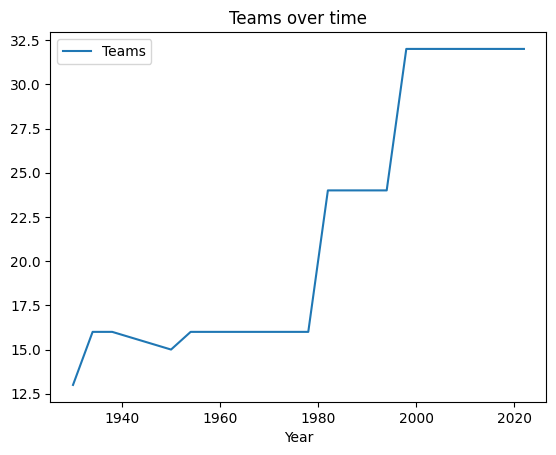

In [49]:
wc.plot(x="Year",y="Teams",kind="line",title="Teams over time")

In [ ]:
#Insight:
#The number of teams participating in the FIFA World Cup has steadily increased over time, reflecting the global expansion of football and greater inclusion of teams from different regions.

<Axes: title={'center': 'Average Goals per Match by Year'}, xlabel='Year'>

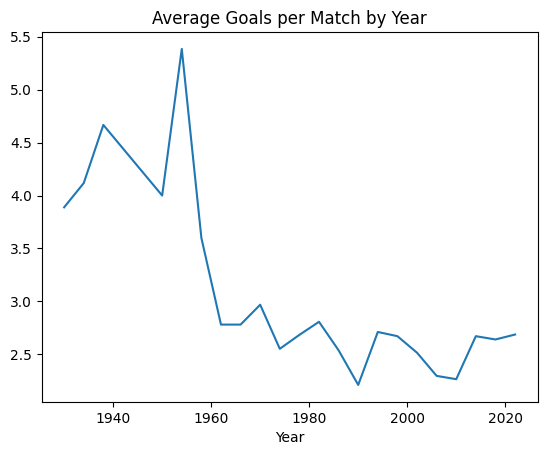

In [50]:
goals_per_year = matches.groupby('Year')['total_goals'].mean()
goals_per_year.plot(title="Average Goals per Match by Year")

In [ ]:
# Insight:
# Average goals per match have shown a gradual decline in recent tournaments, suggesting a shift towards more structured defenses and tactically disciplined gameplay in modern football.

In [51]:
matches.columns

Index(['home_team', 'away_team', 'home_score', 'home_xg', 'home_penalty',
       'away_score', 'away_xg', 'away_penalty', 'home_manager', 'home_captain',
       'away_manager', 'away_captain', 'Attendance', 'Venue', 'Officials',
       'Round', 'Date', 'Score', 'Referee', 'Notes', 'Host', 'Year',
       'home_goal', 'away_goal', 'home_goal_long', 'away_goal_long',
       'home_own_goal', 'away_own_goal', 'home_penalty_goal',
       'away_penalty_goal', 'home_penalty_miss_long', 'away_penalty_miss_long',
       'home_penalty_shootout_goal_long', 'away_penalty_shootout_goal_long',
       'home_penalty_shootout_miss_long', 'away_penalty_shootout_miss_long',
       'home_red_card', 'away_red_card', 'home_yellow_red_card',
       'away_yellow_red_card', 'home_yellow_card_long',
       'away_yellow_card_long', 'home_substitute_in_long',
       'away_substitute_in_long', 'home_xg_available', 'away_xg_available',
       'home_rank', 'home_points', 'away_rank', 'away_points', 'Teams',
       'A

In [52]:
matches.dtypes

home_team                           object
away_team                           object
home_score                           int64
home_xg                            float64
home_penalty                       float64
away_score                           int64
away_xg                            float64
away_penalty                       float64
home_manager                        object
home_captain                        object
away_manager                        object
away_captain                        object
Attendance                           int64
Venue                               object
Officials                           object
Round                               object
Date                                object
Score                               object
Referee                             object
Notes                               object
Host                                object
Year                                 int64
home_goal                           object
away_goal  

In [ ]:
## 5. Player & Team Performance Analysis

In [53]:
goals_home=matches[["Year","home_goal"]].copy()

In [54]:
goals_home.columns=["Year","scorer"]
goals_away=matches[["Year","away_goal"]].copy()
goals_away.columns=["Year","scorer"]

In [55]:
goals_home

,Year,scorer
0,2022,Ángel Di María · 36|Lionel Messi · 108
1,2022,Joško Gvardiol · 7|Mislav Oršić · 42
2,2022,Theo Hernández · 5|Randal Kolo Muani · 79
3,2022,Julián Álvarez · 39|Julián Álvarez · 69
4,2022,Youssef En-Nesyri · 42
...,...,...
959,1930,Luis Monti · 81
960,1930,Aleksandar Tirnanić · 21|Ivan Bek · 30
961,1930,Adalbert Deșu · 1|Constantin Stanciu · 79|Nico...
962,1930,Bart McGhee · 23|Tom Florie · 45|Bert Patenaud...


In [56]:
goals=pd.concat([goals_home,goals_away],ignore_index=True)

In [57]:
goals

,Year,scorer
0,2022,Ángel Di María · 36|Lionel Messi · 108
1,2022,Joško Gvardiol · 7|Mislav Oršić · 42
2,2022,Theo Hernández · 5|Randal Kolo Muani · 79
3,2022,Julián Álvarez · 39|Julián Álvarez · 69
4,2022,Youssef En-Nesyri · 42
...,...,...
1923,1930,Not Available
1924,1930,Preguinho · 62
1925,1930,Luis de Souza Ferreira · 75
1926,1930,Not Available


In [58]:
goals.isna()

,Year,scorer
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1923,False,False
1924,False,False
1925,False,False
1926,False,False


In [59]:
goals=goals[goals["scorer"]!="Not Available"]

In [60]:
goals = goals[goals['scorer'] != 'Not Available'].copy()

In [61]:
goals["scorer"] = goals["scorer"].str.split(r"\|")
goals = goals.explode("scorer")


In [62]:
goals["scorer"]=goals["scorer"].str.split("·").str[0].str.strip()

In [63]:
goal_counts=goals.groupby(["Year","scorer"]).size().reset_index(name="goals")

In [64]:
goal_counts

,Year,scorer,goals
0,1930,Adalbert Deșu,1
1,1930,Adolfo Zumelzú,2
2,1930,Alejandro Scopelli,1
3,1930,Aleksandar Tirnanić,1
4,1930,André Maschinot,2
...,...,...,...
1552,2022,Yeltsin Tejeda,1
1553,2022,Youssef En-Nesyri,2
1554,2022,Zakaria Aboukhlal,1
1555,2022,Álvaro Morata,3


In [65]:
top_scorers=goal_counts.loc[goal_counts.groupby("Year")["goals"].idxmax()]

In [66]:
top_scorers

,Year,scorer,goals
12,1930,Guillermo Stábile,8
70,1934,Oldřich Nejedlý,5
100,1938,Leônidas,7
117,1950,Ademir,8
212,1954,Sándor Kocsis,11
244,1958,Just Fontaine,13
286,1962,Dražan Jerković,4
333,1966,Eusébio,5
384,1970,Gerd Müller,9
433,1974,Grzegorz Lato,7


In [67]:
top_scorers = top_scorers.sort_values('Year')
top_scorers.head()

,Year,scorer,goals
12,1930,Guillermo Stábile,8
70,1934,Oldřich Nejedlý,5
100,1938,Leônidas,7
117,1950,Ademir,8
212,1954,Sándor Kocsis,11


In [ ]:
## 6. Statistical Insights

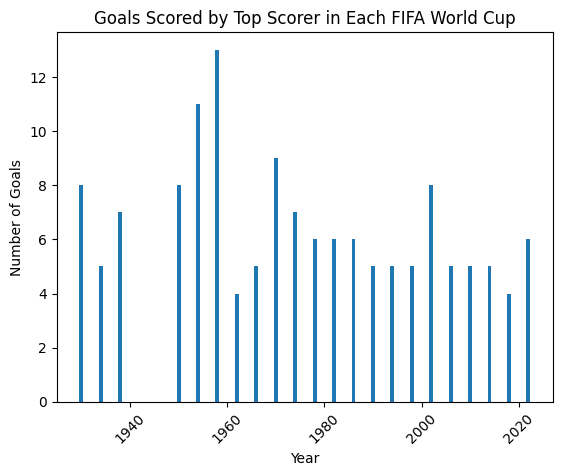

In [68]:
plt.bar(top_scorers["Year"],top_scorers["goals"])
plt.title("Goals Scored by Top Scorer in Each FIFA World Cup")
plt.xlabel("Year")
plt.ylabel("Number of Goals")

plt.xticks(rotation=45)
plt.show()

In [ ]:
# Insight:
# Top scorer goal counts vary significantly across tournaments, with earlier World Cups showing higher individual scoring, while modern tournaments reflect more evenly distributed goal contributions.

In [69]:
# Does Ranking Really Matter?
pd.crosstab(matches['home_stronger'], matches['result'], normalize='index') * 100

result,Away Win,Draw,Home Win
home_stronger,,,
0,29.457364,23.255814,47.286822
1,14.732143,20.982143,64.285714


In [ ]:
# Insight:
# Home teams demonstrate a noticeable advantage in match outcomes, likely due to familiar playing conditions and stronger crowd support, reinforcing the concept of home-field advantage.

In [70]:
home_wins=matches[matches["goal_diff"]>0]["home_team"].value_counts()
away_wins=matches[matches["goal_diff"]<0]["away_team"].value_counts()

In [71]:
total_wins=home_wins.add(away_wins,fill_value=0).sort_values(ascending=False)

In [72]:
total_wins

Brazil                    76.0
Argentina                 47.0
Italy                     45.0
France                    39.0
Germany                   37.0
                          ... 
Cuba                       1.0
Bosnia and Herzegovina     1.0
Slovenia                   1.0
Slovakia                   1.0
Wales                      1.0
Name: count, Length: 65, dtype: float64

In [ ]:
## 7. Key Findings & Conclusion

<Axes: title={'center': 'Top 10 Winning Teams in World Cup History'}>

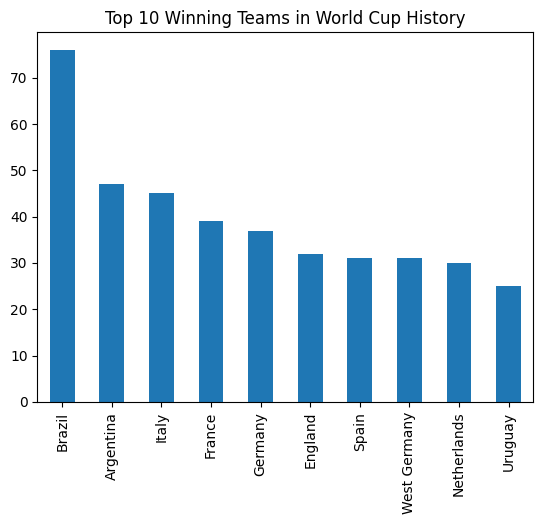

In [73]:
total_wins.head(10).plot(kind="bar",title="Top 10 Winning Teams in World Cup History")

In [ ]:
# Insight:
# Historical match wins further reinforce the dominance of traditional football powers, indicating consistent performance across multiple tournaments rather than isolated successes.

In [74]:
wc_winners=wc[["Year","Champion"]]
wc_winners

,Year,Champion
0,2022,Argentina
1,2018,France
2,2014,Germany
3,2010,Spain
4,2006,Italy
5,2002,Brazil
6,1998,France
7,1994,Brazil
8,1990,West Germany
9,1986,Argentina


<Axes: title={'center': 'World Cup Titles by Country'}, xlabel='Champion'>

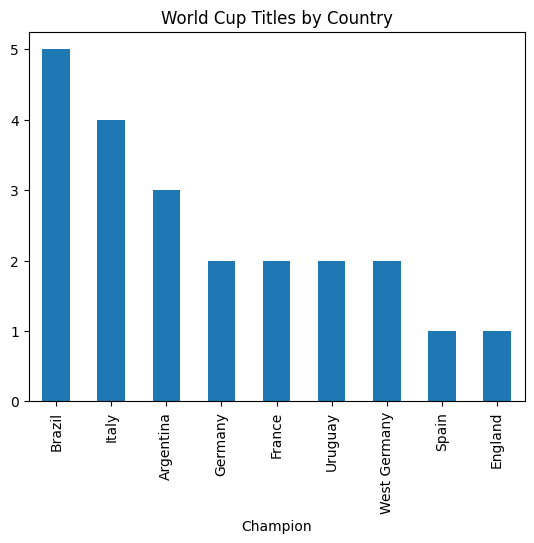

In [75]:
titles=wc["Champion"].value_counts()
titles.plot(kind="bar",title="World Cup Titles by Country")

In [ ]:
# Insight:
# A small group of countries dominates World Cup history, with Brazil, Germany, and Italy leading in total titles, highlighting long-term footballing excellence concentrated among a few nations.